In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv("/Users/jackson/Downloads/titanic/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Data Cleaning
# Replace missing age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [ ]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(mode_embarked, inplace=True)

In [ ]:
# Drop Cabin column as it has a lot of missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

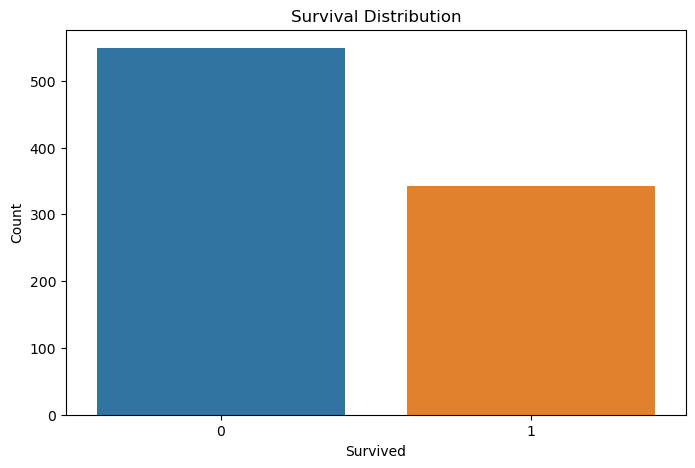

In [12]:
# EDA
# Distribution of survival
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

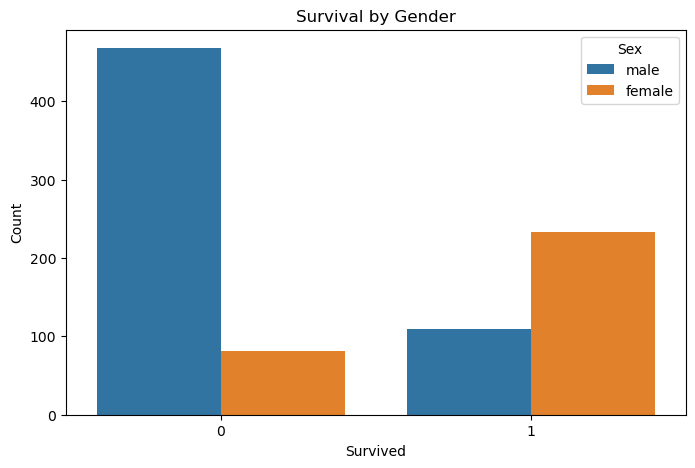

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

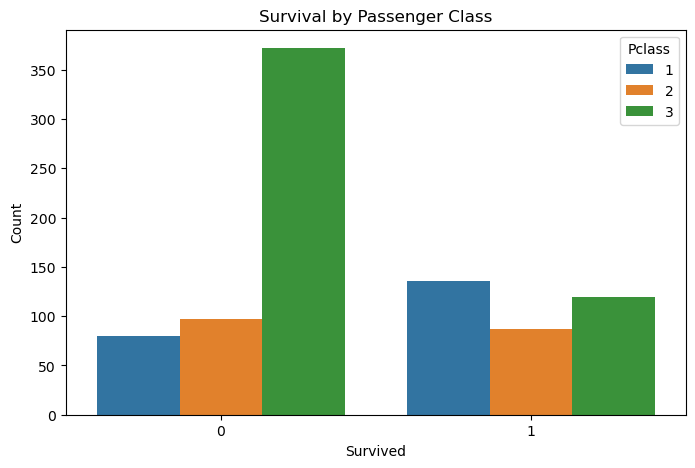

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

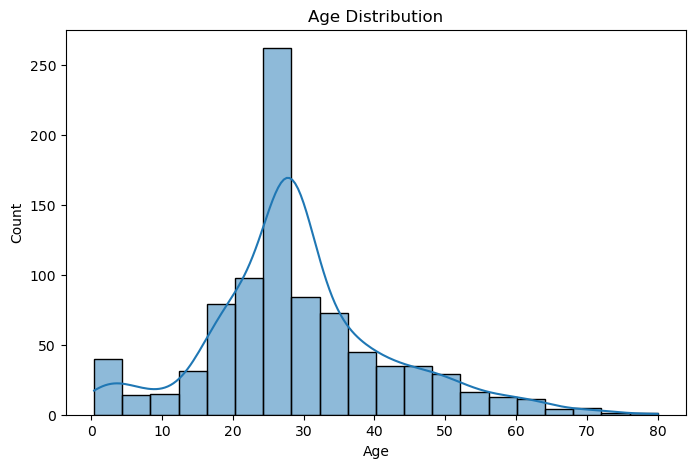

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

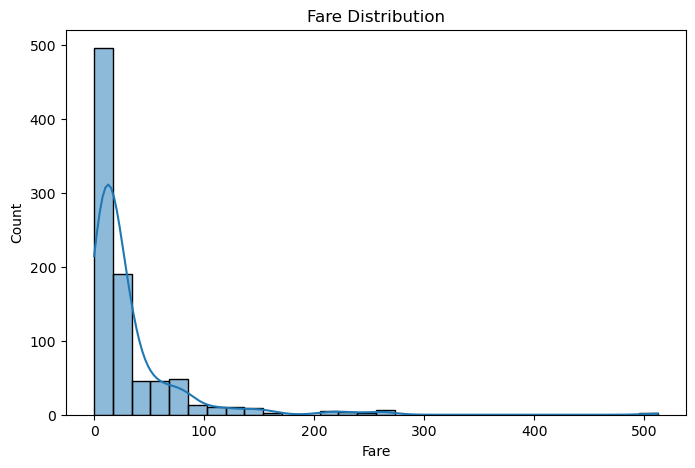

In [16]:
# Fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

/var/folders/7x/r527slr10qbfcy9w60qh79jc0000gn/T/ipykernel_976/1080038084.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


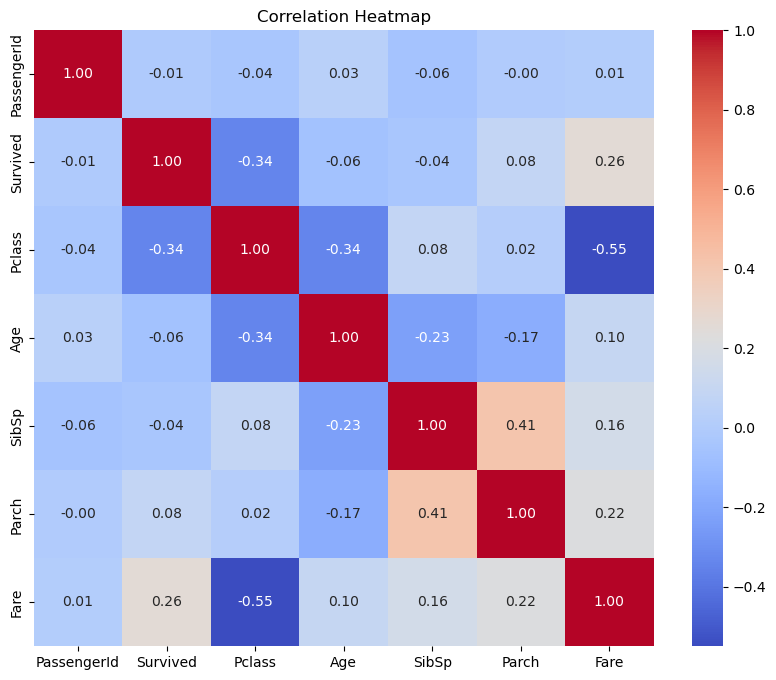

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()